Лабораторная работа №8 Проведение исследований моделями обнаружения и распознавания объектов

Датасет - Bone Fracture Detection: Computer Vision Project

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 112.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [22]:
import os
from ultralytics import YOLO
from sklearn.metrics import precision_score, recall_score, f1_score

In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pkdarabi/bone-fracture-detection-computer-vision-project")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bone-fracture-detection-computer-vision-project


Модель: YOLO

In [23]:
model=YOLO("yolov8n-obb.pt")

results = model.train(
    data="/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml",
    epochs=3,
    device=[0],
    imgsz=640,
    batch=8,
    val=True,
    plots=True,
    save_json=True,
    save_hybrid=True,
    conf=0.5,
    iou=0.5,
)

print("\nTraining Metrics:")
print(f"mAP@0.5: {results.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP@0.5:0.95: {results.results_dict['metrics/mAP50-95(B)']:.4f}")
print(f"Precision: {results.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall: {results.results_dict['metrics/recall(B)']:.4f}")

WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in in the future.
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.5, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.5, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, n

train: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train/labels... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:06<00:00, 519.10it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.3±0.0 ms, read: 25.1±3.2 MB/s, size: 9.2 KB)


val: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<00:00, 370.83it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid is not writeable, cache not saved.


Plotting labels to runs/obb/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3       1.2G      2.248      5.466      2.391          8        640: 100%|██████████| 454/454 [01:23<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:04<00:00,  9.73it/s]

                   all        348        204     0.0897     0.0556     0.0708     0.0307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      1.22G      1.989      3.544       2.34          6        640: 100%|██████████| 454/454 [01:19<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:02<00:00, 16.67it/s]

                   all        348        204      0.222     0.0289      0.122     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      1.24G       1.91       2.99      2.298          6        640: 100%|██████████| 454/454 [01:19<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:02<00:00, 16.43it/s]

                   all        348        204        0.4     0.0858      0.242      0.153



3 epochs completed in 0.070 hours.
Optimizer stripped from runs/obb/train2/weights/last.pt, 6.4MB
Optimizer stripped from runs/obb/train2/weights/best.pt, 6.4MB

Validating runs/obb/train2/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-obb summary (fused): 81 layers, 3,078,584 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:03<00:00, 11.78it/s]


                   all        348        204        0.4     0.0858      0.242      0.153
        elbow positive         28         29          0          0          0          0
      fingers positive         41         48        0.4     0.0417      0.213     0.0955
      forearm fracture         37         43          1       0.14       0.57      0.434
               humerus         31         36          1      0.333      0.667      0.386
     shoulder fracture         19         20          0          0          0          0
        wrist positive         17         28          0          0          0          0
Speed: 0.6ms preprocess, 5.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Saving runs/obb/train2/predictions.json...
Results saved to runs/obb/train2

Training Metrics:
mAP@0.5: 0.2415
mAP@0.5:0.95: 0.1525
Precision: 0.4000
Recall: 0.0858


Результат на картинках


image 1/1 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/images/image1_2062_png.rf.96caca3e4789f028ac1329ea33773425.jpg: 1024x832 (no detections), 13.4ms
Speed: 7.2ms preprocess, 13.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 832)


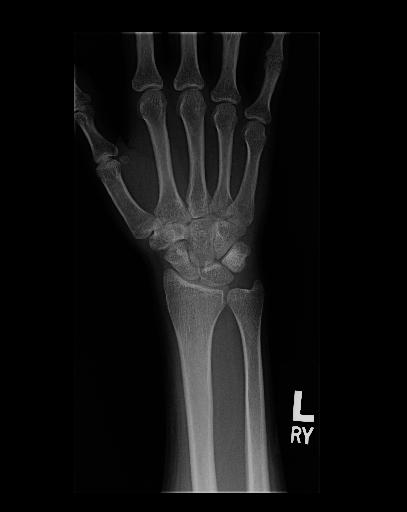


image 1/1 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/images/image1_1244_png.rf.10768651f2631bbbf28837704e2c9916.jpg: 768x1024 (no detections), 79.4ms
Speed: 8.0ms preprocess, 79.4ms inference, 0.8ms postprocess per image at shape (1, 3, 768, 1024)


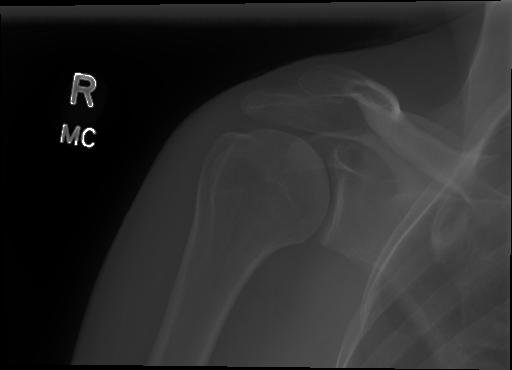


image 1/1 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/images/image1_979_png.rf.b94742342af786f4577502a93255029a.jpg: 1024x864 None76.6ms
Speed: 7.5ms preprocess, 76.6ms inference, 6.2ms postprocess per image at shape (1, 3, 1024, 864)


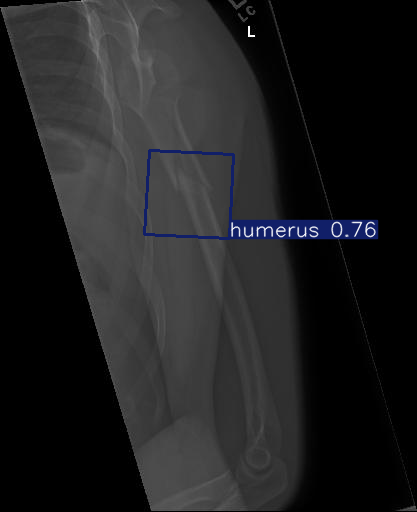


image 1/1 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/images/image1_3244_png.rf.195b93d43b6794dc57bb36564d208192.jpg: 1024x640 (no detections), 81.0ms
Speed: 5.9ms preprocess, 81.0ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 640)


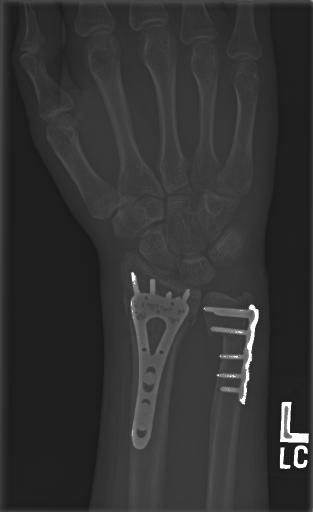


image 1/1 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/images/image1_548_png.rf.042f9ef1d41fe9e8cfc84c43a6d33bed.jpg: 1024x832 (no detections), 20.6ms
Speed: 6.9ms preprocess, 20.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 832)


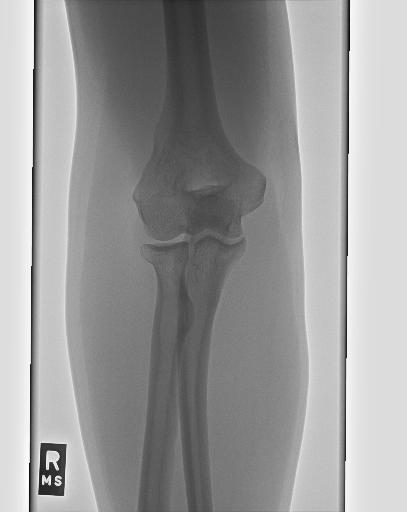

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import random

model = YOLO("/content/runs/obb/train/weights/best.pt")
val_images_dir = "/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/images/"
all_images = [f for f in os.listdir(val_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

random_images = random.sample(all_images, min(5, len(all_images)))

for img_name in random_images:
    img_path = os.path.join(val_images_dir, img_name)
    results = model(img_path, box=0)
    for result in results:
        result.show()


Улучшение бейзлайна:
- Подбор гиперпараметров модели
- Улучшение конфигурации
- fine-tuning

In [29]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model = YOLO("yolov8n-obb.pt").to(device)

results = model.train(
    data=os.path.join(path, "BoneFractureYolo8/data.yaml"),
    epochs=3,
    batch=16 if device == 'cuda' else 8,
    imgsz=640,
    device=device,
    optimizer='AdamW',
    lr0=0.001,
    lrf=0.01,
    momentum=0.9,
    weight_decay=0.0005,
    box=7.5,
    cls=0.5,
    dfl=1.5,
    label_smoothing=0.1,
    augment=True,
    mosaic=0.8,
    mixup=0.1,
    copy_paste=0.1,
    erasing=0.4,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10.0,
    translate=0.1,
    scale=0.5,
    shear=2.0,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    close_mosaic=10,
    patience=15,
    val=True,
    plots=True,
    save_json=True,
    name='bone_fracture_obb_optimized'
)

print("\nOptimized Training Metrics:")
print(f"mAP@0.5: {results.results_dict['metrics/mAP50(B)']:.4f}")
print(f"mAP@0.5:0.95: {results.results_dict['metrics/mAP50-95(B)']:.4f}")
print(f"Precision: {results.results_dict['metrics/precision(B)']:.4f}")
print(f"Recall: {results.results_dict['metrics/recall(B)']:.4f}")

Using device: cuda
WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8n-obb.pt, momentum=0.9, mosaic=0.8, multi_scale=False

train: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train/labels... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:04<00:00, 732.50it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 24.6±2.5 MB/s, size: 9.2 KB)


val: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<00:00, 640.11it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid is not writeable, cache not saved.


Plotting labels to runs/obb/bone_fracture_obb_optimized3/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/bone_fracture_obb_optimized3
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.43G      2.254      4.438       2.53         22        640: 100%|██████████| 227/227 [01:32<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.67it/s]

                   all        348        204     0.0362      0.264     0.0546     0.0226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.45G      2.115      3.555      2.476         14        640: 100%|██████████| 227/227 [01:25<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.51it/s]

                   all        348        204      0.423      0.152      0.152     0.0653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.47G      2.001      3.172      2.366         12        640: 100%|██████████| 227/227 [01:42<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.20it/s]

                   all        348        204       0.19      0.268       0.23      0.108



3 epochs completed in 0.082 hours.
Optimizer stripped from runs/obb/bone_fracture_obb_optimized3/weights/last.pt, 6.5MB
Optimizer stripped from runs/obb/bone_fracture_obb_optimized3/weights/best.pt, 6.5MB

Validating runs/obb/bone_fracture_obb_optimized3/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-obb summary (fused): 81 layers, 3,078,584 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/22 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▍         | 1/22 [00:00<00:05,  3.74it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   9%|▉         | 2/22 [00:01<00:10,  1.85it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▎        | 3/22 [00:02<00:17,  1.10it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  18%|█▊        | 4/22 [00:03<00:16,  1.06it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  23%|██▎       | 5/22 [00:03<00:13,  1.23it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  27%|██▋       | 6/22 [00:04<00:09,  1.68it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  32%|███▏      | 7/22 [00:04<00:06,  2.18it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▋      | 8/22 [00:04<00:05,  2.76it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  41%|████      | 9/22 [00:04<00:03,  3.32it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  45%|████▌     | 10/22 [00:04<00:03,  3.89it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 11/22 [00:04<00:02,  4.47it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▍    | 12/22 [00:05<00:02,  4.32it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  59%|█████▉    | 13/22 [00:05<00:01,  4.67it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▎   | 14/22 [00:05<00:01,  4.20it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  68%|██████▊   | 15/22 [00:05<00:01,  4.60it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  73%|███████▎  | 16/22 [00:05<00:01,  5.12it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  77%|███████▋  | 17/22 [00:06<00:00,  5.34it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  82%|████████▏ | 18/22 [00:06<00:00,  5.68it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▋ | 19/22 [00:06<00:00,  5.84it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  91%|█████████ | 20/22 [00:06<00:00,  5.94it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  95%|█████████▌| 21/22 [00:06<00:00,  6.01it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.20it/s]


                   all        348        204      0.187      0.269      0.231      0.109
        elbow positive         28         29      0.105     0.0345      0.103     0.0428
      fingers positive         41         48      0.159      0.271      0.164      0.075
      forearm fracture         37         43      0.385      0.512       0.49      0.244
               humerus         31         36      0.247      0.611      0.468      0.235
     shoulder fracture         19         20       0.18       0.15      0.124      0.043
        wrist positive         17         28     0.0445     0.0357     0.0349     0.0128
Speed: 0.3ms preprocess, 3.4ms inference, 0.0ms loss, 7.1ms postprocess per image
Saving runs/obb/bone_fracture_obb_optimized3/predictions.json...
Results saved to runs/obb/bone_fracture_obb_optimized3

Optimized Training Metrics:
mAP@0.5: 0.2306
mAP@0.5:0.95: 0.1088
Precision: 0.1867
Recall: 0.2690



image 1/1 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/images/image1_2062_png.rf.96caca3e4789f028ac1329ea33773425.jpg: 1024x832 (no detections), 13.2ms
Speed: 4.8ms preprocess, 13.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 832)


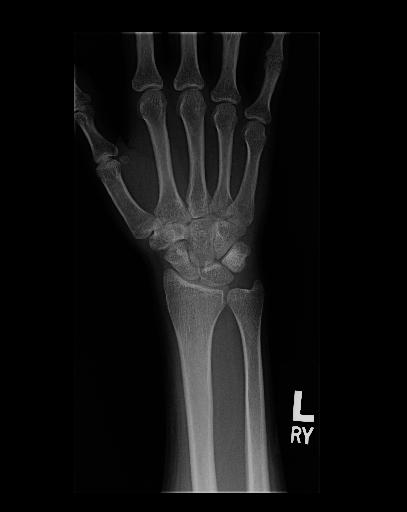


image 1/1 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/images/image1_1244_png.rf.10768651f2631bbbf28837704e2c9916.jpg: 768x1024 (no detections), 12.8ms
Speed: 6.7ms preprocess, 12.8ms inference, 0.7ms postprocess per image at shape (1, 3, 768, 1024)


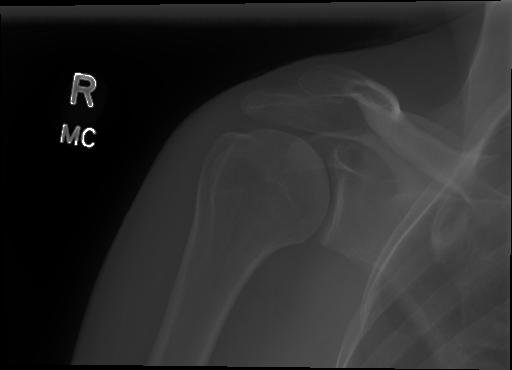


image 1/1 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/images/image1_979_png.rf.b94742342af786f4577502a93255029a.jpg: 1024x864 None13.6ms
Speed: 7.3ms preprocess, 13.6ms inference, 3.3ms postprocess per image at shape (1, 3, 1024, 864)


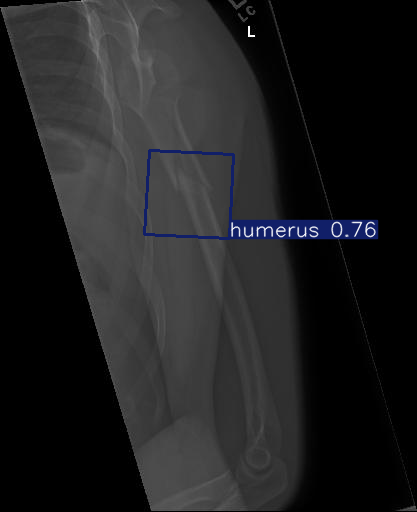


image 1/1 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/images/image1_3244_png.rf.195b93d43b6794dc57bb36564d208192.jpg: 1024x640 (no detections), 13.5ms
Speed: 7.6ms preprocess, 13.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 640)


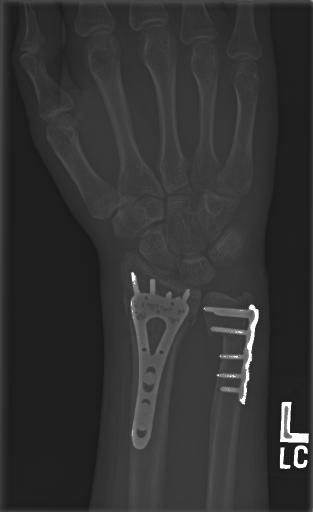


image 1/1 /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/images/image1_548_png.rf.042f9ef1d41fe9e8cfc84c43a6d33bed.jpg: 1024x832 (no detections), 17.1ms
Speed: 7.1ms preprocess, 17.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 832)


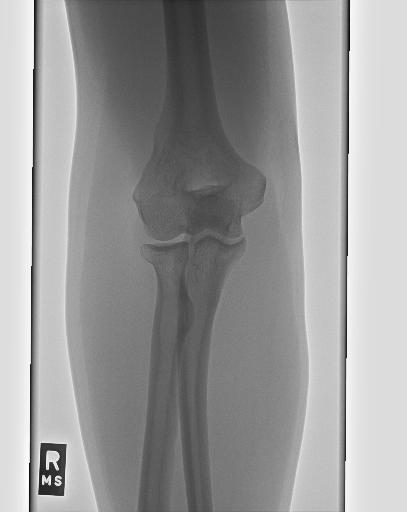

In [31]:
model = YOLO("/content/runs/obb/train/weights/best.pt")
val_images_dir = "/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/images/"
all_images = [f for f in os.listdir(val_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

random_images = random.sample(all_images, min(5, len(all_images)))

for img_name in random_images:
    img_path = os.path.join(val_images_dir, img_name)
    results = model(img_path, box=0)
    for result in results:
        result.show()

Самостоятельная имплементация

In [1]:
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import kagglehub
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class BoneFractureOBBModel(nn.Module):
    def __init__(self, num_classes=1):
        super().__init__()
        self.backbone = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.obb_head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 80 * 80, 512),
            nn.ReLU(),
            nn.Linear(512, 6)
        )

    def forward(self, x):
        x = x.float()  # Приводим вход к float32
        return self.obb_head(self.backbone(x))

class BoneFractureDataset(Dataset):
    def __init__(self, root_dir, transform=None, img_size=640):
        self.root_dir = root_dir
        self.transform = transform
        self.img_size = img_size  # Добавляем этот атрибут
        self.image_dir = os.path.join(root_dir, "images")
        self.label_dir = os.path.join(root_dir, "labels")
        self.images = [f for f in os.listdir(self.image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        label_path = os.path.join(self.label_dir, os.path.splitext(self.images[idx])[0] + '.txt')

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        target = torch.zeros(6, dtype=torch.float32)  # Явно указываем float32

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                lines = f.readlines()
                if lines:
                    parts = list(map(float, lines[0].strip().split()))
                    class_id = int(parts[0])
                    points = np.array(parts[1:9], dtype=np.float32).reshape(4, 2)  # float32
                    points = points / self.img_size
                    target = torch.tensor(self.obb_to_target(points, class_id), dtype=torch.float32)

        return image, target

    def obb_to_target(self, points, class_id=0):
        center = points.mean(axis=0)
        vec1 = points[1] - points[0]
        vec2 = points[2] - points[1]
        length1 = np.linalg.norm(vec1)
        length2 = np.linalg.norm(vec2)

        width = max(length1, length2)
        height = min(length1, length2)
        angle = np.arctan2(vec1[1], vec1[0])

        return torch.tensor([center[0], center[1], width, height, angle, class_id])

def train_model(model, dataloader, epochs=1, device='cpu'):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    model.train()
    model.to(device)

    for epoch in range(epochs):
        total_loss = 0.0  # Инициализация здесь

        for images, targets in dataloader:
            # Явное преобразование к float32
            images = images.float().to(device)
            targets = targets.float().to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()  # Теперь безопасное использование

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(dataloader):.4f}")

device = 'cuda' if torch.cuda.is_available() else 'cpu'
dataset_path = kagglehub.dataset_download("pkdarabi/bone-fracture-detection-computer-vision-project")
data_dir = os.path.join(dataset_path, "BoneFractureYolo8/train")

transform = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.ToTensor(),
])

dataset = BoneFractureDataset(
    data_dir,
    transform=transform,
    img_size=640
)

# Уменьшаем batch_size для экономии памяти
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

model = BoneFractureOBBModel()
train_model(model, dataloader, epochs=1, device=device)

<ipython-input-1-85a9a351b5b7>:63: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(self.obb_to_target(points, class_id), dtype=torch.float32)


Epoch 1/1, Loss: 1.2558


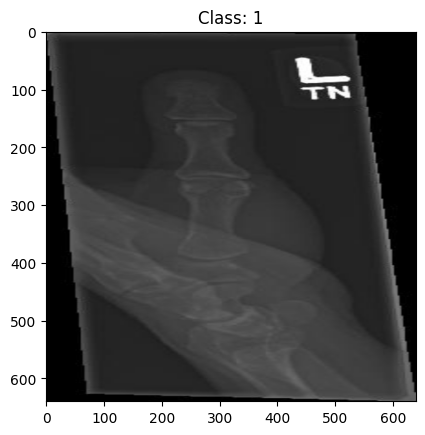

<ipython-input-1-85a9a351b5b7>:63: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(self.obb_to_target(points, class_id), dtype=torch.float32)


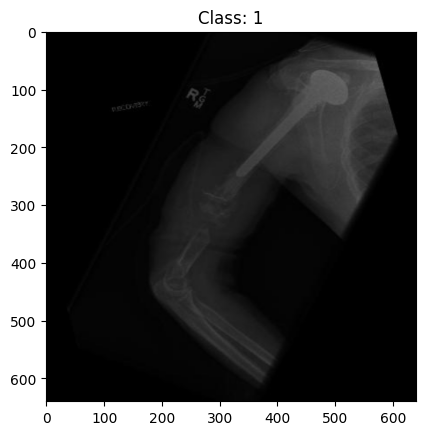

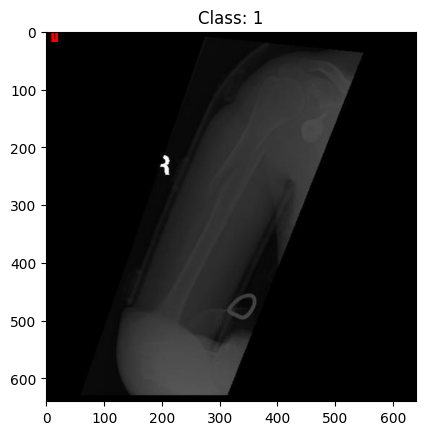

In [42]:
def target_to_obb(cx, cy, w, h, angle, img_size=640):
    """Конвертирует нормализованные координаты в пиксельные координаты OBB"""
    # Денормализация координат
    cx = cx * img_size
    cy = cy * img_size
    w = w * img_size
    h = h * img_size

    # Создаем точки относительно центра
    points = np.array([
        [-w/2, -h/2],
        [w/2, -h/2],
        [w/2, h/2],
        [-w/2, h/2]
    ])

    # Матрица поворота
    rot_mat = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
    ])

    # Поворачиваем и смещаем точки
    points = np.dot(points, rot_mat) + np.array([cx, cy])

    return points

def visualize_predictions(model, dataset, device='cpu', num_images=3):
    model.eval()
    indices = random.sample(range(len(dataset)), num_images)

    for idx in indices:
        image, target = dataset[idx]
        with torch.no_grad():
            pred = model(image.unsqueeze(0).to(device))[0].cpu().numpy()

        # Распаковываем предсказание
        cx, cy, w, h, angle, class_id = pred

        # Конвертируем в OBB координаты
        points = target_to_obb(
            cx=cx,
            cy=cy,
            w=w,
            h=h,
            angle=angle,
            img_size=dataset.img_size  # Передаем размер изображения
        )

        # Визуализация
        fig, ax = plt.subplots(1)
        ax.imshow(image.permute(1, 2, 0))

        # Рисуем OBB
        rect = patches.Polygon(points, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.title(f"Class: {class_id:.0f}")
        plt.show()

visualize_predictions(model, dataset, device=device, num_images=3)

Выводы:
- YOLO оказалось подходящей моделью для задачи обнаружения и распознавания объектов
- Улучшения гиперпараметров и fine-tuning дали результаты
- Самостоятельная имплементация оставляет желать лучшего...